# Машинное обучение в бизнесе

**Цели проекта:**
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Описание данных**

Данные геологоразведки трёх регионов:

- _id_ — уникальный идентификатор скважины;
- _f0, f1, f2_ — три признака точек (неважно, что они означают, но сами признаки значимы);
- _product_ — объём запасов в скважине (тыс. баррелей).

**План проекта:**
1. Загрузка данных
2. Обучение модели
3. Подготовка данных
4. Расчёт прибыли по выбранным скважинам и предсказаниям модели
5. Риски и прибыль для каждого региона
6. Общие выводы

In [1]:
# импорт бибилеотек

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import stats as st
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder

RANDOM_STATE = 42
TEST_SIZE = 0.25

## Загрузка данных

In [2]:
# чтение данных
try:
    geo_data_0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Choosing the location for the well/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Choosing the location for the well/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/Choosing the location for the well/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# изучение geo_data_0
geo_data_0.info()
display(geo_data_0.head())
geo_data_0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [4]:
# изучение geo_data_1
geo_data_1.info()
display(geo_data_1.head())
geo_data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [5]:
# изучение geo_data_2
geo_data_2.info()
display(geo_data_2.head())
geo_data_2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### Выводы
- Данные загружены и не требуют предобрабтки

## Обучение модели

### Регион 1

In [6]:
X_0 = geo_data_0.drop(['product', 'id'], axis=1)
y_0 = geo_data_0['product']

# разделение на обучающую и валидационную выборки
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(
    X_0,
    y_0,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE)

# обучение модели
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)
predict_0 = model_0.predict(X_valid_0)
rmse_0 = mean_squared_error(y_valid_0, predict_0)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_0)
print('Средний запас сырья: %.2f'% predict_0.mean())

Среднеквадратичная ошибка RMSE: 37.76
Средний запас сырья: 92.40


### Регион 2

In [7]:
X_1 = geo_data_1.drop(['product', 'id'], axis=1)
y_1 = geo_data_1['product']

# разделение на обучающую и валидационную выборки
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(
    X_1,
    y_1,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE)

# обучение модели
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
predict_1 = model_1.predict(X_valid_1)
rmse_1 = mean_squared_error(y_valid_1, predict_1)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_1)
print('Средний запас сырья: %.2f'% predict_1.mean())

Среднеквадратичная ошибка RMSE: 0.89
Средний запас сырья: 68.71


### Регион 3

In [8]:
X_2 = geo_data_2.drop(['product', 'id'], axis=1)
y_2 = geo_data_2['product']

# разделение на обучающую и валидационную выборки
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(
    X_2,
    y_2,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE)

# обучение модели
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
predict_2 = model_2.predict(X_valid_2)
rmse_2 = mean_squared_error(y_valid_2, predict_2)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_2)
print('Средний запас сырья: %.2f'% predict_2.mean())

Среднеквадратичная ошибка RMSE: 40.15
Средний запас сырья: 94.77


## Подготовка данных

In [9]:
# бюджет на разработку скважин в регионе, тыс.руб
BUDGET = 10000000
# доход с каждой единицы продукта, тыс.руб
INCOME_ONE = 450
# вероятность убытков
PROBABILITY_LOSSES = 2.5/100

In [10]:
budg_1_point = (BUDGET/200)# тыс.руб
print('Бюджет на разработку одной скважины:', budg_1_point/1000,'млн.руб')
V_point = budg_1_point/INCOME_ONE
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%V_point,'тыс.баррелей')

Бюджет на разработку одной скважины: 50.0 млн.руб
Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


### Регион 1

In [11]:
geo_data_0['profit'] = (geo_data_0['product']*(INCOME_ONE)).round(2)
geo_data_0.head()

,id,f0,f1,f2,product,profit
0,txEyH,0.705745,-0.497823,1.221170,105.280062,47376.03
1,2acmU,1.334711,-0.340164,4.365080,73.037750,32866.99
2,409Wp,1.022732,0.151990,1.419926,85.265647,38369.54
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,75879.35
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,69316.49


In [12]:
print('Разница объёма сырья для безубыточной разработки по 1 региону: {:.2%}'.format(predict_0.mean()/V_point-1))
print('{:.2f} тыс.баррелей'.format(V_point-predict_0.mean()))

Разница объёма сырья для безубыточной разработки по 1 региону: -16.84%
18.71 тыс.баррелей


### Регион 2

In [13]:
geo_data_1['profit'] = (geo_data_1['product']*(INCOME_ONE)).round(2)
geo_data_1.head()

,id,f0,f1,f2,product,profit
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,1430.60
1,62mP7,14.272088,-3.475083,0.999183,26.953261,12128.97
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,60644.84
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,62075.43
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,60644.84


In [14]:
print('Разница объёма сырья для безубыточной разработки по 2 региону: {:.2%}'.format(predict_1.mean()/V_point-1))
print('{:.2f} тыс.баррелей'.format(V_point-predict_1.mean()))

Разница объёма сырья для безубыточной разработки по 2 региону: -38.16%
42.40 тыс.баррелей


### Регион 3

In [16]:
geo_data_2['profit'] = (geo_data_2['product']*(INCOME_ONE)).round(2)
geo_data_2.head()

,id,f0,f1,f2,product,profit
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,12491.40
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,25231.36
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,28292.36
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,51557.78
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,67320.34


In [17]:
print('Разница объёма сырья для безубыточной разработки по 3 региону: {:.2%}'.format(predict_2.mean()/V_point-1))
print('{:.2f} тыс.баррелей'.format(V_point-predict_2.mean()))

Разница объёма сырья для безубыточной разработки по 3 региону: -14.71%
16.34 тыс.баррелей


### Выводы:
Среднего количества сырья по регионам недостаточно для безубточной разработки, требуется выбрать скважины с максимальными запасами

## Расчёт прибыли по выбранным скважинам и предсказаниям модели

In [18]:
def profit_for_vp(predict, target, count):
    well_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_max = well_sorted[:count].sum()
    profit_pred=(selected_max*INCOME_ONE)-BUDGET
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/1000))

#### Регион 1

In [19]:
profit_for_vp(predict_0, y_valid_0, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 30881.46 тыс.баррелей
Прибыль для полученного объёма сырья составит 3896.66 млн.рублей


#### Регион 2

In [20]:
profit_for_vp(predict_1, y_valid_1, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 27748.75 тыс.баррелей
Прибыль для полученного объёма сырья составит 2486.94 млн.рублей


#### Регион 3

In [21]:
profit_for_vp(predict_2, y_valid_2, 200)

Суммарный запас сырья в 200 лучших скважинах составит: 29728.85 тыс.баррелей
Прибыль для полученного объёма сырья составит 3377.98 млн.рублей


#### Выводы: все регионы потенциально выгодня для разработки.

## Риски и прибыль для каждого региона

In [169]:
def profit(predict, target, count):
    well_sorted = pd.Series(predict).reset_index(drop=True).sort_values(ascending=False)
    selected_points = target.reset_index(drop=True)[well_sorted.index][:count]

    product = selected_points.sum()
    revenue = product * INCOME_ONE
    return revenue - BUDGET

In [170]:
def bootstap_1000(target, predict):
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)

    for i in tqdm(range(1000)):
        target_subsample = target.sample(n=500,replace=True, random_state=state)
        well_subsample = predict_e[target_subsample.index]
        
        values.append(profit(well_subsample,target_subsample, 200))
    for i in values:
        if i < 0:
            count +=1

    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())

    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(7,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()

    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)

    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((low_95/1000),(high_95/1000)))
    print("95%-ый доверительный интервал: {:.2f} млн.руб - {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе: {:.1%}'.format(count/1000))

#### Распределение прибыли в 1 регионе

  0%|          | 0/1000 [00:00<?, ?it/s]

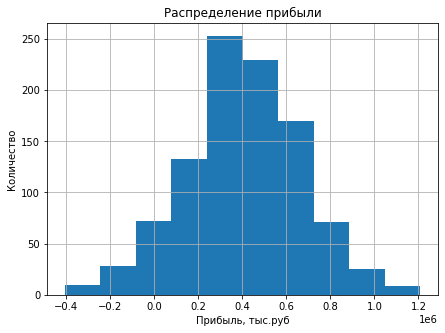

Средняя прибыль: 406.28 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -117.74 млн.руб до: 911.74 млн.руб
95%-ый доверительный интервал: 389.98 млн.руб - 422.58 млн.руб
Процент вероятности убытка в данном регионе: 6.7%


In [171]:
bootstap_1000(y_valid_0, predict_0)

#### Распределение прибыли во 2 регионе

  0%|          | 0/1000 [00:00<?, ?it/s]

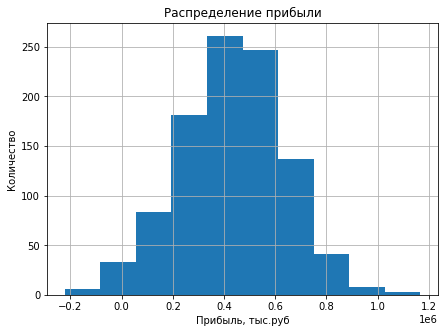

Средняя прибыль: 432.62 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 16.85 млн.руб до: 815.97 млн.руб
95%-ый доверительный интервал: 420.01 млн.руб - 445.24 млн.руб
Процент вероятности убытка в данном регионе: 1.9%


In [172]:
bootstap_1000(y_valid_1, predict_1)

#### Распределение прибыли в 3 регионе

  0%|          | 0/1000 [00:00<?, ?it/s]

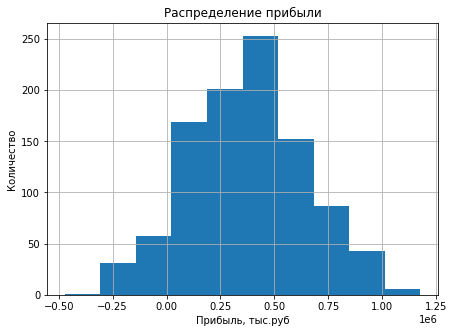

Средняя прибыль: 377.36 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -170.78 млн.руб до: 901.77 млн.руб
95%-ый доверительный интервал: 360.62 млн.руб - 394.11 млн.руб
Процент вероятности убытка в данном регионе: 7.4%


In [173]:
bootstap_1000(y_valid_2, predict_2)

#### Выбор региона

In [174]:
reg_tab = pd.DataFrame(index=['Средняя прибыль в регионе, млн.руб','Суммарный запас сырья, тыс.баррелей','Вероятность убытка, %'], columns=['1 регион','2 регион','3 регион'])
reg_tab['1 регион'] = '406.28', '30881.46','6.7'
reg_tab['2 регион'] = '432.62', '27748.75','1.9'
reg_tab['3 регион'] = '377.36', '29728.85','7.4'
reg_tab

,1 регион,2 регион,3 регион
"Средняя прибыль в регионе, млн.руб",406.28,432.62,377.36
"Суммарный запас сырья, тыс.баррелей",30881.46,27748.75,29728.85
"Вероятность убытка, %",6.7,1.9,7.4


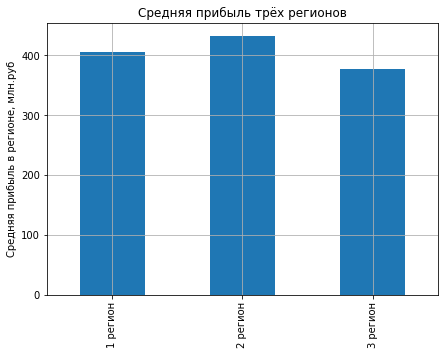

In [175]:
reg_tab.astype('float').iloc[0,:].plot(kind="bar", figsize=(7,5), grid=True, subplots=True)
plt.title('Средняя прибыль трёх регионов')
plt.ylabel('Средняя прибыль в регионе, млн.руб')
plt.show()

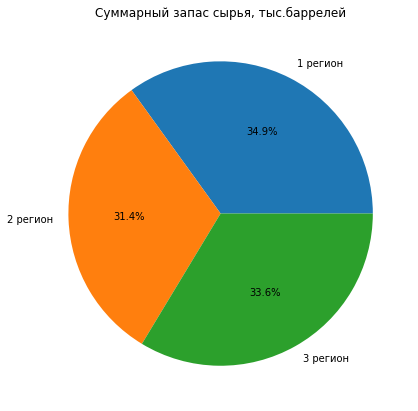

In [176]:
reg_tab.astype('float').iloc[1,:].plot(kind='pie', figsize=(7,7),autopct='%1.1f%%', subplots=True)
plt.title('Суммарный запас сырья, тыс.баррелей')
plt.ylabel('')
plt.show()

#### Выводы:
По распределению средней прибыли, самым прибыльным оказался 2-й регион со средней прибылью 489.66 млн рублей. Два других региона не подходят по минимальному порогу убытка в 2,5%. Несмотря на меньшие запасы сырья, средняя доходность скважин во втором регионе прогнозируется выше.

## Общие выводы

В процессе исследования были проанализирован данные по 3 регионам. В каждом были изучены данные по запасам сырья в 10 тыс. скважин.

В ходе анализа выяснилось, что средний запас ресурсов по регионам недостаточен для окупаемости вложений. Для оценки перспективности разработки была обучена модель линейной регрессии и использовали метод bootstrap с 1000 выборок для каждого предсказания прибыли.

Определив 95%-й доверительный интервал прибыли и ограничив вероятность убытка до 2,5%, получилось выбрать наиболее перспективный регион для разработки 200 скважин.

Регион 2 несмотря на сравнительно меньшие прогнозируемые запасы сырья (27748.75 тыс.баррелей) и вероятность убытка 1.9%, второй регион показал наибольшую среднюю прибыль в 445.24 млн рублей. Полученные данные определили выбор в пользу 2 региона.